In [18]:
# PROBLEM 1
# STEP 1
# Definition of the input image and filters
I = np.array([
    [-1, 2, -2, 0, 1],
    [3, -3, 1, 2, 0],
    [-1, 0, 2, -1, 3],
    [2, 1, -2, -3, 0],
    [-3, 2, 0, 1, -1]
])

F1 = np.array([[1, -1], [0, 1]])
F2 = np.array([[-1, 0], [1, 1]])

# Compute convolutions
feature_map1 = convolve2d(I, F1)
feature_map2 = convolve2d(I, F2)

In [19]:
print(feature_map1)

[[-6.  5.  0. -1.]
 [ 6. -2. -2.  5.]
 [ 0. -4.  0. -4.]
 [ 3.  3.  2. -4.]]


In [20]:
print(feature_map2)

[[ 1. -4.  5.  2.]
 [-4.  5.  0.  0.]
 [ 4. -1. -7. -2.]
 [-3.  1.  3.  3.]]


In [21]:
# STEP 2
# Apply activations to feature maps
activations = ['relu', 'sigmoid', 'tanh']
activated_maps = {
    act: {
        'F1': apply_activation(feature_map1, act),
        'F2': apply_activation(feature_map2, act)
    }
    for act in activations
}

In [22]:
activated_maps

{'relu': {'F1': array([[0., 5., 0., 0.],
         [6., 0., 0., 5.],
         [0., 0., 0., 0.],
         [3., 3., 2., 0.]]),
  'F2': array([[1., 0., 5., 2.],
         [0., 5., 0., 0.],
         [4., 0., 0., 0.],
         [0., 1., 3., 3.]])},
 'sigmoid': {'F1': array([[0.00247262, 0.99330715, 0.5       , 0.26894142],
         [0.99752738, 0.11920292, 0.11920292, 0.99330715],
         [0.5       , 0.01798621, 0.5       , 0.01798621],
         [0.95257413, 0.95257413, 0.88079708, 0.01798621]]),
  'F2': array([[7.31058579e-01, 1.79862100e-02, 9.93307149e-01, 8.80797078e-01],
         [1.79862100e-02, 9.93307149e-01, 5.00000000e-01, 5.00000000e-01],
         [9.82013790e-01, 2.68941421e-01, 9.11051194e-04, 1.19202922e-01],
         [4.74258732e-02, 7.31058579e-01, 9.52574127e-01, 9.52574127e-01]])},
 'tanh': {'F1': array([[-0.99998771,  0.9999092 ,  0.        , -0.76159416],
         [ 0.99998771, -0.96402758, -0.96402758,  0.9999092 ],
         [ 0.        , -0.9993293 ,  0.        , -0.999

In [23]:
# STEP 3
pool_methods = ['max', 'min', 'avg']
pool_size = 2

pooled_outputs = {
    act: {
        'F1': {method: pooling2d(activated_maps[act]['F1'], pool_size, method)
               for method in pool_methods},
        'F2': {method: pooling2d(activated_maps[act]['F2'], pool_size, method)
               for method in pool_methods}
    }
    for act in activations
}

In [12]:
pooled_outputs

{'relu': {'F1': {'max': array([[6., 5.],
          [3., 2.]]),
   'min': array([[0., 0.],
          [0., 0.]]),
   'avg': array([[2.75, 1.25],
          [1.5 , 0.5 ]])},
  'F2': {'max': array([[5., 5.],
          [4., 3.]]),
   'min': array([[0., 0.],
          [0., 0.]]),
   'avg': array([[1.5 , 1.75],
          [1.25, 1.5 ]])}},
 'sigmoid': {'F1': {'max': array([[0.99752738, 0.99330715],
          [0.95257413, 0.88079708]]),
   'min': array([[0.00247262, 0.11920292],
          [0.01798621, 0.01798621]]),
   'avg': array([[0.52812752, 0.47036287],
          [0.60578362, 0.35419237]])},
  'F2': {'max': array([[0.99330715, 0.99330715],
          [0.98201379, 0.95257413]]),
   'min': array([[0.01798621, 0.5       ],
          [0.04742587, 0.00091105]]),
   'avg': array([[0.44008454, 0.71852606],
          [0.50735992, 0.50631556]])}},
 'tanh': {'F1': {'max': array([[0.99998771, 0.9999092 ],
          [0.99505475, 0.96402758]]),
   'min': array([[-0.99998771, -0.96402758],
          [-0.9

In [24]:
# STEP 4
# Flatten the pooled outputs
flattened_F1 = pooled_outputs['relu']['F1']['max'].flatten()  # [6, 5, 4, 2]
flattened_F2 = pooled_outputs['relu']['F2']['max'].flatten()  # [5, 5, 4, 3]

# Define weights and biases
W1 = np.array([1, -1, 0, 1])
W2 = np.array([0, 1, -1, -1])
b1, b2 = 1, -1

# Compute neuron outputs
y1 = np.dot(W1, flattened_F1) + b1  # Using F1 output
y2 = np.dot(W2, flattened_F1) + b2  # Using F1 output
print(y1)
print(y2)

4.0
-1.0


In [25]:
# STEP 5
# Apply softmax to get probabilities
probs = softmax(np.array([y1, y2]))
probs

array([0.99330715, 0.00669285])

In [38]:
# PROBLEM 2
import numpy as np

# Data
X = np.array([
    [-1, 2],
    [2, -2],
    [-2, 1],
    [1, 1],
    [-1, -1]
])
y = np.array([1.5, 0.5, -1.0, 1.0, -1.5])

In [39]:
class RegressionModel:
    def __init__(self, reg_type='ridge', lambda_reg=0.1, learning_rate=0.1):
        self.reg_type = reg_type
        self.lambda_reg = lambda_reg
        self.lr = learning_rate
        self.w1 = 0
        self.w2 = 0
        self.w3 = 0
        self.b = 0
        
    def predict(self, X):
        return (self.w1 * X[:, 0] + 
                self.w2 * X[:, 1] + 
                self.w3 * (X[:, 0] * X[:, 1]) + 
                self.b)
    
    def compute_metrics(self, X, y):
        predictions = self.predict(X)
        mse = np.mean((predictions - y) ** 2)
        mae = np.mean(np.abs(predictions - y))
        
        if self.reg_type == 'ridge':
            reg_term = self.lambda_reg * (self.w1**2 + self.w2**2 + self.w3**2)
        else:  # lasso
            reg_term = self.lambda_reg * (np.abs(self.w1) + np.abs(self.w2) + np.abs(self.w3))
            
        total_loss = mse + reg_term
        return total_loss, mse, mae
    
    def gradient_step(self, X, y):
        predictions = self.predict(X)
        errors = predictions - y
        N = len(y)
        
        # Common gradient terms
        grad_w1 = (2/N) * np.sum(errors * X[:, 0])
        grad_w2 = (2/N) * np.sum(errors * X[:, 1])
        grad_w3 = (2/N) * np.sum(errors * (X[:, 0] * X[:, 1]))
        grad_b = (2/N) * np.sum(errors)
        
        # Add regularization terms
        if self.reg_type == 'ridge':
            grad_w1 += 2 * self.lambda_reg * self.w1
            grad_w2 += 2 * self.lambda_reg * self.w2
            grad_w3 += 2 * self.lambda_reg * self.w3
        else:  # lasso
            grad_w1 += self.lambda_reg * np.sign(self.w1) if self.w1 != 0 else 0
            grad_w2 += self.lambda_reg * np.sign(self.w2) if self.w2 != 0 else 0
            grad_w3 += self.lambda_reg * np.sign(self.w3) if self.w3 != 0 else 0
        
        # Update parameters
        self.w1 -= self.lr * grad_w1
        self.w2 -= self.lr * grad_w2
        self.w3 -= self.lr * grad_w3
        self.b -= self.lr * grad_b
        
        return grad_w1, grad_w2, grad_w3, grad_b

def train_until_convergence(model, X, y, tol=1e-6, max_iter=10000):
    prev_loss = float('inf')
    history = []
    
    for iteration in range(max_iter):
        # Perform gradient step
        grads = model.gradient_step(X, y)
        
        # Compute current metrics
        loss, mse, mae = model.compute_metrics(X, y)
        history.append((loss, mse, mae))
        
        # Check convergence
        if abs(prev_loss - loss) < tol:
            print(f"\n{model.reg_type.capitalize()} regression converged after {iteration+1} iterations")
            break
            
        prev_loss = loss
        
        # Print progress every 1000 iterations
        if (iteration + 1) % 1000 == 0:
            print(f"Iteration {iteration+1}: Loss = {loss:.6f}, MSE = {mse:.6f}, MAE = {mae:.6f}")
    
    return history

Training Ridge Regression...

Ridge regression converged after 31 iterations

Final Ridge Parameters:
w1 = 0.673555
w2 = 0.689465
w3 = -0.152448
b = -0.084946
Final Ridge MSE: 0.134470
Final Ridge MAE: 0.273998

Training Lasso Regression...

Lasso regression converged after 32 iterations

Final Lasso Parameters:
w1 = 0.693109
w2 = 0.705802
w3 = -0.142751
b = -0.072909
Final Lasso MSE: 0.130865
Final Lasso MAE: 0.285240


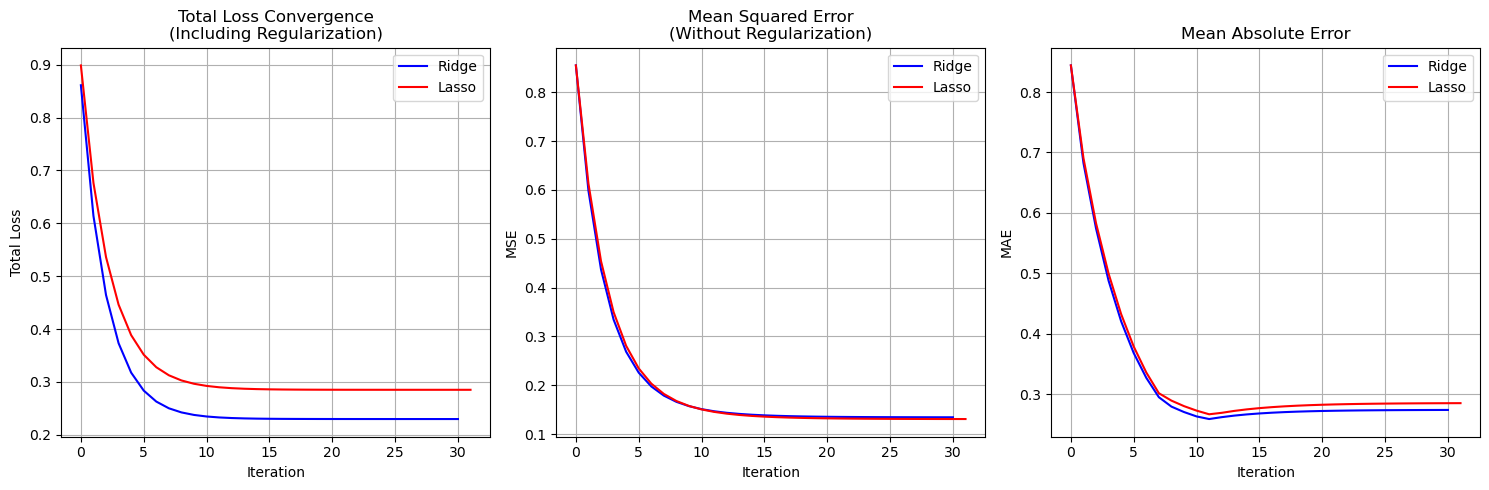


Final Values after Convergence:
Ridge Regression:
Total Loss: 0.229698
MSE: 0.134470
MAE: 0.273998

Lasso Regression:
Total Loss: 0.285031
MSE: 0.130865
MAE: 0.285240


In [41]:
# Train both models
print("Training Ridge Regression...")
ridge_model = RegressionModel(reg_type='ridge')
ridge_history = train_until_convergence(ridge_model, X, y)

print("\nFinal Ridge Parameters:")
print(f"w1 = {ridge_model.w1:.6f}")
print(f"w2 = {ridge_model.w2:.6f}")
print(f"w3 = {ridge_model.w3:.6f}")
print(f"b = {ridge_model.b:.6f}")
final_ridge_loss, final_ridge_mse, final_ridge_mae = ridge_model.compute_metrics(X, y)
print(f"Final Ridge MSE: {final_ridge_mse:.6f}")
print(f"Final Ridge MAE: {final_ridge_mae:.6f}")

print("\nTraining Lasso Regression...")
lasso_model = RegressionModel(reg_type='lasso')
lasso_history = train_until_convergence(lasso_model, X, y)

print("\nFinal Lasso Parameters:")
print(f"w1 = {lasso_model.w1:.6f}")
print(f"w2 = {lasso_model.w2:.6f}")
print(f"w3 = {lasso_model.w3:.6f}")
print(f"b = {lasso_model.b:.6f}")
final_lasso_loss, final_lasso_mse, final_lasso_mae = lasso_model.compute_metrics(X, y)
print(f"Final Lasso MSE: {final_lasso_mse:.6f}")
print(f"Final Lasso MAE: {final_lasso_mae:.6f}")

# Plots for better visualization
plt.figure(figsize=(15, 5))

# Plot 1: Total Loss (Loss including regularization term)
plt.subplot(1, 3, 1)
plt.plot([loss for loss, _, _ in ridge_history], label='Ridge', color='blue')
plt.plot([loss for loss, _, _ in lasso_history], label='Lasso', color='red')
plt.xlabel('Iteration')
plt.ylabel('Total Loss')
plt.title('Total Loss Convergence\n(Including Regularization)')
plt.legend()
plt.grid(True)

# Plot 2: MSE
plt.subplot(1, 3, 2)
plt.plot([mse for _, mse, _ in ridge_history], label='Ridge', color='blue')
plt.plot([mse for _, mse, _ in lasso_history], label='Lasso', color='red')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Mean Squared Error\n(Without Regularization)')
plt.legend()
plt.grid(True)

# Plot 3: MAE
plt.subplot(1, 3, 3)
plt.plot([mae for _, _, mae in ridge_history], label='Ridge', color='blue')
plt.plot([mae for _, _, mae in lasso_history], label='Lasso', color='red')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final values for clarity
print("\nFinal Values after Convergence:")
print("=" * 50)
print("Ridge Regression:")
print(f"Total Loss: {final_ridge_loss:.6f}")
print(f"MSE: {final_ridge_mse:.6f}")
print(f"MAE: {final_ridge_mae:.6f}")

print("\nLasso Regression:")
print(f"Total Loss: {final_lasso_loss:.6f}")
print(f"MSE: {final_lasso_mse:.6f}")
print(f"MAE: {final_lasso_mae:.6f}")